## New York City Airbnb Explotary Data Analysis and Rental Price Prediction

### Abstract

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. Today, Airbnb has become one of a kind service that is used and recognized by the whole world. Millions of data has been generated through Airbnb and these data could be useful for business desicion making, undestanding customer behaviors, guiding marketing iniatives and much more.

The purpose of this project is to gain some insight into New York City Airbnb Market and use machine learning algorithms to predict rental prices.

In this data science project, we use New York City Airbnb Open Data from Kaggle. This dataset describes the listing activity and metrics in NYC, NY for 2019.
It includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Read Data

In [4]:
df = pd.read_csv("AB_NYC_2019.csv")

In [5]:
df.shape

(48895, 16)

### Basic Information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 1. Data Cleaning

### 1.1 Check duplicated values

In [7]:
df['id'].nunique()

48895

The number of rows of the original dataset is the same as the unique number of ids, so there is no duplicated values in this dataset.

### 1.2 **Examine missing values**

In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In our case, the missing values of 'name' and 'host_name' are irrevant and insignificant to our data analysis.
Column ' last_review' and 'reveiews per month' can be handled by droping missing values and filling in with '0'.
To elaborate, 'last_review' is date, if there was no last reivew, then the date simply doesn't exist. Also, if there are no reviews for the listing, then reviews_per_month would be zero.

In [9]:
df['reviews_per_month'].fillna('0', inplace = True)

In [10]:
df = df[df['name'].notnull()]

In [11]:
df.drop(['id','last_review','host_name'], axis = 1, inplace = True)

### 1.3 Detect Outliers

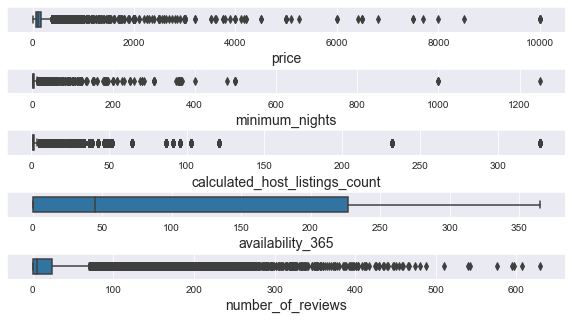

In [12]:
subsets = ['price','minimum_nights','calculated_host_listings_count','availability_365','number_of_reviews']
fig, axi = plt.subplots(len(subsets), 1, figsize = (10,5))
plt.subplots_adjust(hspace = 1.5)
for i, subset in enumerate(subsets):
    sns.boxplot(df[subset], ax = axi[i], whis = 2, orient = 'h', width = 0.6)
    axi[i].set_xlabel(subset, fontsize = 14)

We can see from the boxplots that there exist several extreme outliers in column 'price', and 'minimum_nights' that would impact our analysis. 
At this stage, we only keep those data whose price is above zero and do some explortary data analysis.
We will delete those data whose prices are above 600 later in the prediction phase.

In [13]:
df = df[df['price'] > 0]

This is our data after preliminary cleaning.

In [14]:
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.1,1,0


## 2. Exploratory Data Analysis

It is useful that we first examine some interesting categorical unique values.

In [15]:
print('Neighbourhood group:',df['neighbourhood_group'].unique())

Neighbourhood group: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


In [16]:
print('The number of unique neighbourhood:',len(df['neighbourhood'].unique()))

The number of unique neighbourhood: 221


In [17]:
print('Room Type:',df['room_type'].unique())

Room Type: ['Private room' 'Entire home/apt' 'Shared room']


We find that the data covers 5 neighbourhood groups and 221 neighbourhoods, and there are 3 room types in total.

Let's first get a glimpse of what the top 10 popular hosts look like.

### 2.1 Hosts Information Analysis

In [18]:
top10 = df['host_id'].value_counts().head(10)
top10 = top10.to_frame().reset_index()
top10.columns = ['host_id','count']

[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

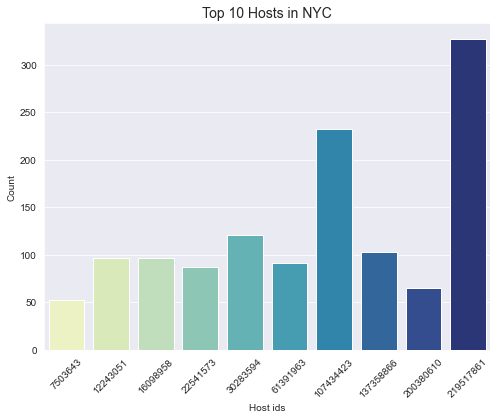

In [86]:
plt.figure(figsize=(8,6))
fig1 = sns.barplot(x='host_id', y ='count', data = top10, palette='YlGnBu')
fig1.set_title('Top 10 Hosts in NYC', fontsize=14)
fig1.set_xlabel('Host ids')
fig1.set_ylabel('Count')
fig1.set_xticklabels(fig1.get_xticklabels(),rotation = 45)

In [20]:
host_ids = [7503643,12243051,16098958,22541573,30283594,61391963,107434423,137358866,200380610,219517861]
nbg = []
for host in host_ids:
    nbg.append(df.loc[df['host_id'] == host].neighbourhood_group.unique()[0])
print(nbg)

['Brooklyn', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan', 'Manhattan']


We can see from the graph that there is a big difference between the most popular host and the least popular host within the top 10 range. The most poluar host has more than 300 house listings while the latter has slightly over 50 listings. Other popular hosts have around 100 house listings.

It shows that 90% of the top 10 popular hosts have a large number of properties in Manhattan.

### 2.2 Property Information Analysis

#### 2.2.1 Neighborhood Distribution

Text(0, 0.5, 'Number')

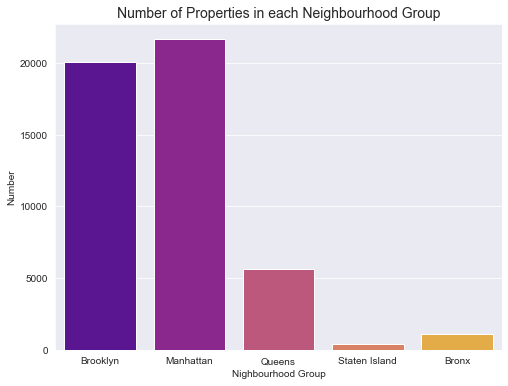

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(df['neighbourhood_group'], palette = 'plasma')
plt.title('Number of Properties in each Neighbourhood Group',fontsize=14)
plt.xlabel('Nighbourhood Group')
plt.ylabel('Number')

We can see that there are more than 20,000 hosts in Manhattan and Brooklyn while there are no more than 2,500 hosts in Staten Island and Bronx, and there are about 6,000 hosts in Queens. This makes sense because Brooklyn, Manhattan and Queens are very popular districts.

In [65]:
nbh_count = df.groupby('neighbourhood').agg('count')
nbh_top10 = nbh_count.sort_values(by='host_id',ascending = False).head(10).reset_index()

Text(0.5, 0, 'Count')

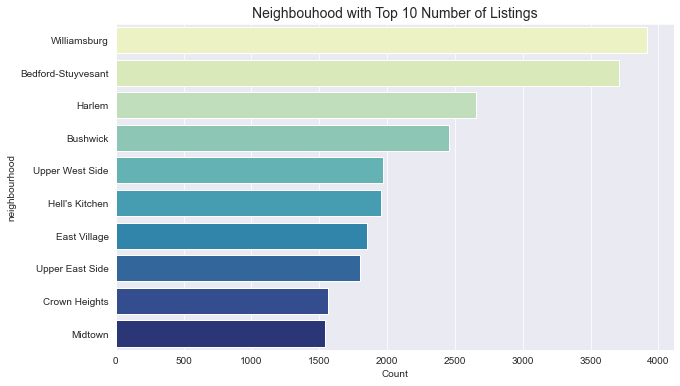

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(x='host_id',y='neighbourhood',data=nbh_top10,palette='YlGnBu')
plt.title('Neighbouhood with Top 10 Number of Listings', fontsize=14)
plt.xlabel('Count')

#### 2.2.2 Room Type

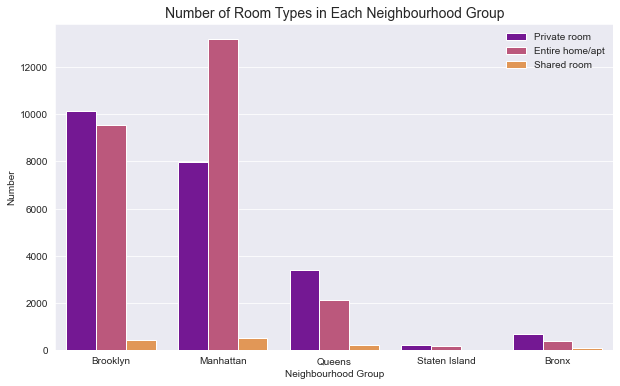

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='neighbourhood_group',hue='room_type', data=df, palette = 'plasma')
plt.title('Number of Room Types in Each Neighbourhood Group',fontsize=14)
plt.ylabel('Number')
plt.xlabel('Neighbourhood Group')
plt.legend(frameon=False, fontsize=10)

Most common room types are private room and entire home or apartment. In Manhattan, entire home/apt has much more hosts than just private room does, while in other areas the hosts of private rooms are greater than entire home/apt.

We can see more clearly the distribution of room types using map.

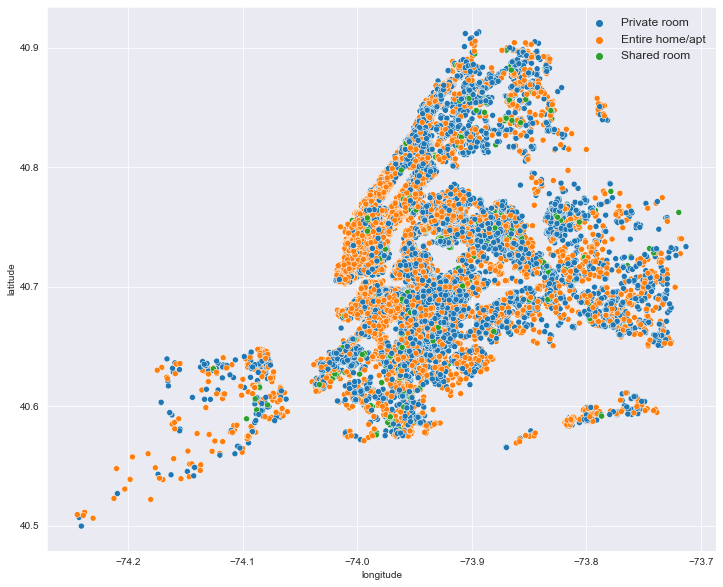

In [23]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='longitude',y='latitude',hue='room_type',data=df)
plt.legend(frameon=False, fontsize=12)

#### 2.2.3 Rental Price Analysis

In [24]:
sub1 = df[df['neighbourhood_group'] == 'Brooklyn']
sub1_price = sub1[['price']]
sub2 = df[df['neighbourhood_group'] == 'Manhattan']
sub2_price = sub2[['price']]
sub3 = df[df['neighbourhood_group'] == 'Queens']
sub3_price = sub3[['price']]
sub4 = df[df['neighbourhood_group'] == 'Staten Island']
sub4_price = sub4[['price']]
sub5 = df[df['neighbourhood_group'] == 'Bronx']
sub5_price = sub5[['price']]
price_list = [sub1_price, sub2_price, sub3_price, sub4_price, sub5_price]

In [25]:
df_price_list = []
neigh = ['Brooklyn','Manhattan', 'Queens', 'Staten Island', 'Bronx']
for sub_price in price_list:
    i = sub_price.describe(percentiles=[0.25, 0.50, 0.75])
    i = i.iloc[3: ]
    
    i.reset_index(inplace = True)
    i.rename(columns = {'index':'Stats'}, inplace = True)
    df_price_list.append(i)
    
for n in range(0,5):
    df_price_list[n].rename(columns = {'price': neigh[n]}, inplace = True)

In [26]:
stat_df = df_price_list
stat_df = [df.set_index('Stats') for df in stat_df]
stat_df = stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,10.0,10.0,10.0,13.0,10.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


From the table above we can see that the medium price within each group is less than 100 except Manhattan. The lowest price is around 10 for every group, even in Manhattan.

As has been mentioned earlier, there exist extrem outliers in price. When we explore the price density, we delete those data whose rental price is above 600.

Text(0, 0.5, 'Price')

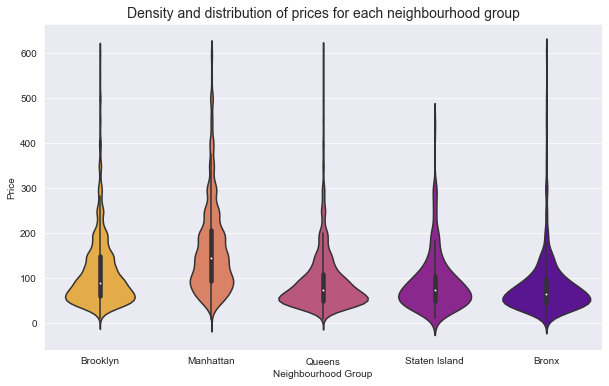

In [27]:
sub6 = df[df.price <= 600]
plt.figure(figsize=(10,6))
fig2 = sns.violinplot(data = sub6, x='neighbourhood_group', y='price',palette='plasma_r')
fig2.set_title('Density and distribution of prices for each neighbourhood group',fontsize=14)
fig2.set_xlabel('Neighbourhood Group')
fig2.set_ylabel('Price')

This viloin plot has demonstrated very clearly the density and distribution of rental price within each group. In general, we can see that the most common rental price is around 75. In Manhattan, the price is slightly higher than other groups but it's still less than 100.

#### The Ten Most Expensive Neighbourhoods

In [28]:
price_mean = df.groupby('neighbourhood').agg({'price':np.mean})
top10_price = price_mean.reset_index().sort_values(by=['price'],ascending=False).head(10)

Text(0.5, 1.0, 'The Top 10 Expensive Neighbourhoods')

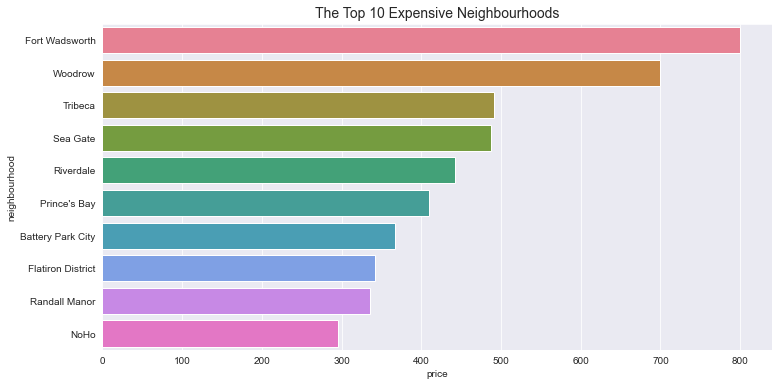

In [29]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
sns.barplot(x='price',y='neighbourhood',data=top10_price, palette='husl')
plt.title('The Top 10 Expensive Neighbourhoods',fontsize=14)

In [30]:
df.loc[df['neighbourhood'].isin(['Woodrow','Fort Wadsworth'])]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3049,Spacious center hall colonial,9430973,Staten Island,Woodrow,40.53884,-74.19826,Entire home/apt,700,7,0,0,1,0
25386,Beach House Retreat. 15 minutes from Manhattan.,1715301,Staten Island,Fort Wadsworth,40.59546,-74.06092,Entire home/apt,800,7,0,0,3,365


The top 2 most expensive neighbourhoods are in Staten Island, and the third one is in Manhattan. The first two ones have no reviews and each neighbourhood only has one house listing.

#### Average Rental Price Trend

In [31]:
price_mean_ng = df.groupby(['neighbourhood_group','room_type']).agg({'price':np.mean})
price_mean_ng = price_mean_ng.unstack()
room_types = ['Entire home/apt', 'Private room', 'Shared room']
price_mean_ng.columns = room_types
price_mean_ng_t = df.groupby('neighbourhood_group').agg({'price':np.mean})

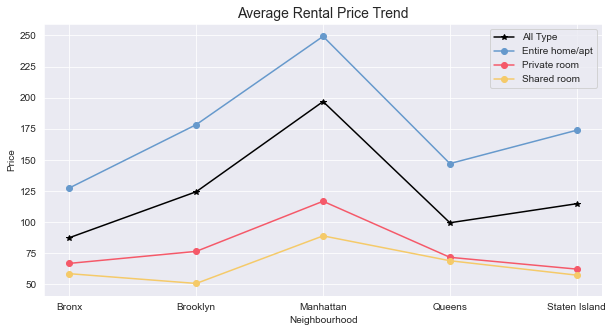

In [32]:
colors=['#6699CC', '#F55969', '#F5CA69']
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(price_mean_ng_t.index,price_mean_ng_t.values,color='black',marker='*',label = 'All Type')
for x, y in enumerate(colors):
    ax.plot(price_mean_ng.index, price_mean_ng.iloc[:,x], color=y, marker='o',label = room_types[x])
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Price')
ax.legend()
plt.title('Average Rental Price Trend',fontsize=14)
plt.show()

For all room types, rental price in Manhattan is the highest, followed by Brooklyn and Queens.

### 2.3 Maps for Data Visulization 

In [33]:
import geopandas as gpd
from shapely import wkt

#### 2.3.1 Number of Airbnb Listings by NYC Neighbourhood Group

In [34]:
neigh_count = df.groupby('neighbourhood_group').agg('count').reset_index()
neigh_count.rename(columns={'neighbourhood_group':'boroname'},inplace=True)
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
nyc_geo = nyc.merge(neigh_count, on='boroname')

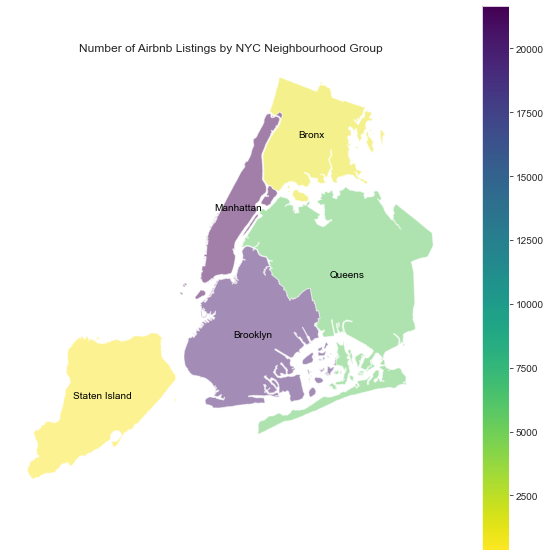

In [35]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
nyc_geo.plot(column='host_id',cmap='viridis_r',alpha=0.5,ax=ax,legend=True)
nyc_geo.apply(lambda x: ax.annotate(text=x.boroname,color='black',xy=x.geometry.centroid.coords[0],ha='center'),axis=1)
plt.title('Number of Airbnb Listings by NYC Neighbourhood Group')
plt.axis('off')
plt.show()

The top 2 house listings are in Manhattan and Brokklyn, followed by Queens. Staten Island and Bronx have the least number of listings. 

#### 2.3.2 The Number of Properties by Neighbourhood

In [36]:
nbhoods = pd.read_csv('nynta.csv')
nbhoods.rename(columns={'NTAName':'neighbourhood'},inplace=True)
nbhoods['geom'] = nbhoods['the_geom'].apply(wkt.loads)
nbhoods = gpd.GeoDataFrame(nbhoods, geometry='geom')
df_geo = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude,df.latitude))
joined = gpd.sjoin(nbhoods, df_geo, how='inner',op='intersects')
joined.drop(columns='geom',inplace=True)
joined.rename(columns={'neighbourhood_left':'neighbourhood'},inplace=True)
nb_joined_count = joined.groupby('neighbourhood').agg('count').reset_index()

In [37]:
true_count = nbhoods.merge(nb_joined_count, on='neighbourhood')

Text(0.5, 1.0, 'Number of Airbnb Listings by Neighbourhood in NYC')

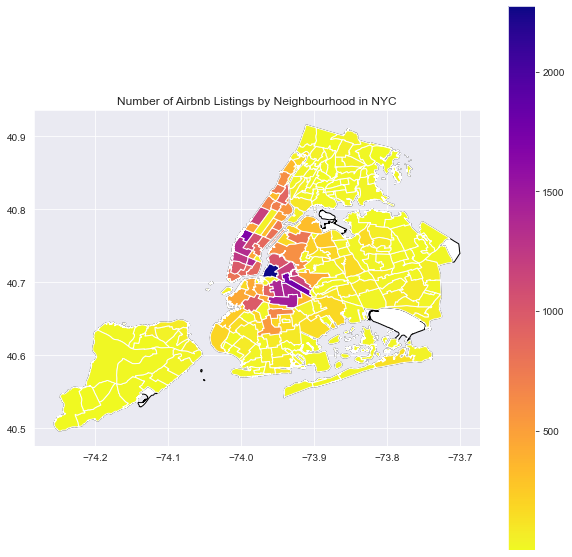

In [38]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
base = nbhoods.plot(color='white',edgecolor='black',ax=ax)
true_count.plot(column='host_id',cmap='plasma_r',ax=base,legend=True)
plt.title('Number of Airbnb Listings by Neighbourhood in NYC')

The white area means that there is no listing in that neighbourhood. Most of the house listings are in Manhattan and Brooklyn.

#### 2.3.3 Rental Price Distribution by Neighbourhood

In [39]:
price_median = joined.groupby('neighbourhood').agg({'price':np.median})
ture_price_m = nbhoods.merge(price_median, on='neighbourhood')

Text(0.5, 1.0, 'Rental Price by Neighbourhood in NYC')

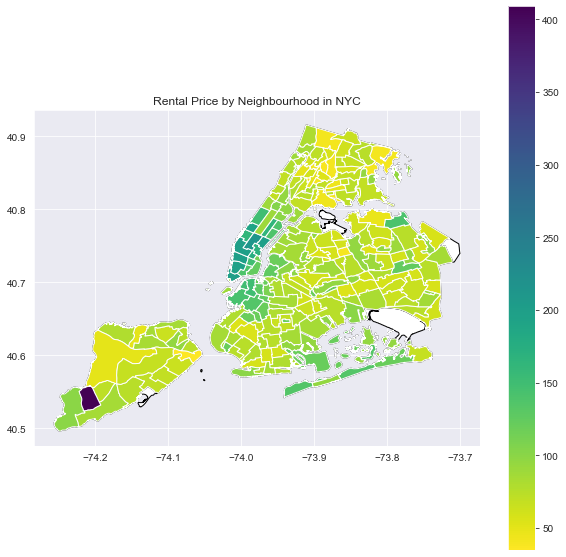

In [40]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
base = nbhoods.plot(color='white',edgecolor='black',ax=ax)
ture_price_m.plot(column='price',cmap='viridis_r',ax=base,legend=True)
plt.title('Rental Price by Neighbourhood in NYC')

As has shown in the bar chart earlier, the two most expensive neighbourhoods are in Staten Island, followed by neighbourhoods in Manhattan.

### 2.4 WordCloud for Data Visulization

#### Find out the most common words in house names.

In [41]:
import regex as re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

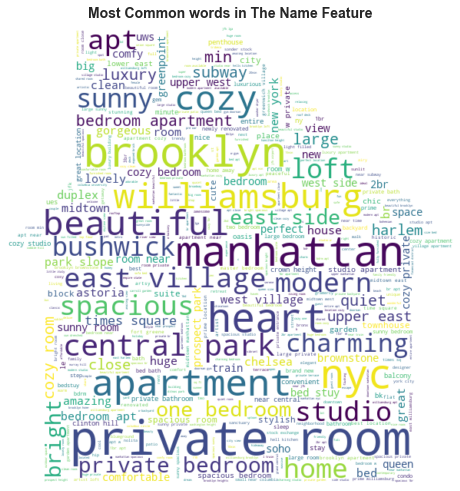

In [42]:
name_mask = np.array(Image.open("house.png"))
names = ' '.join(df['name'].str.lower().values)
stopwords = set(STOPWORDS)
names_wc = WordCloud(background_color='white', max_words=2000, mask=name_mask, stopwords=stopwords)
names_wc.generate(names)
fig3 = plt.figure()
fig3.set_figwidth(8)
fig3.set_figheight(10)
plt.imshow(names_wc,interpolation = 'bilinear')
plt.title('Most Common words in The Name Feature',fontsize=14,fontweight='bold')
plt.axis('off')
plt.show()

We observe that 'Private room', 'Brooklyn', 'Manhattan', 'Williamsburg', 'NYC', 'central park', and 'heart' are some most common words in property names. We can see that most hosts use simple words in a short form to describe the room type and location of their properties for easier search by a potential traveler. There are no catchphrases such as 'popular' or 'trending'. In fact, the name contains what a potantial traveler values most. As has been seen before, Manhattan and Brooklyn are the two most popular neighbourhood groups, and Williamsburg is the most popular neighbourhood. In addition, private room and apartment seem like popular chioces for travelers.

## 3. Rental Price Prediction

In [43]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics

### 3.1 Further Data Cleaning

In order to suit our needs for rental price prediction, we will do a further data cleaning at this stage.

We delete irrelavant column 'host_id' and keep data whose price is no more than 600.

In [44]:
df_p = df.drop(['host_id','name','geometry'],axis=1)
df_p = df_p[df_p['price'] <= 600]

In [45]:
df_p['reviews_per_month'] = df_p['reviews_per_month'].astype('float')

In [46]:
df_p.dtypes

neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Now let's see what our data looks like now.

In [47]:
df_p.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### 3.2 Get correlation between different variables

<AxesSubplot:>

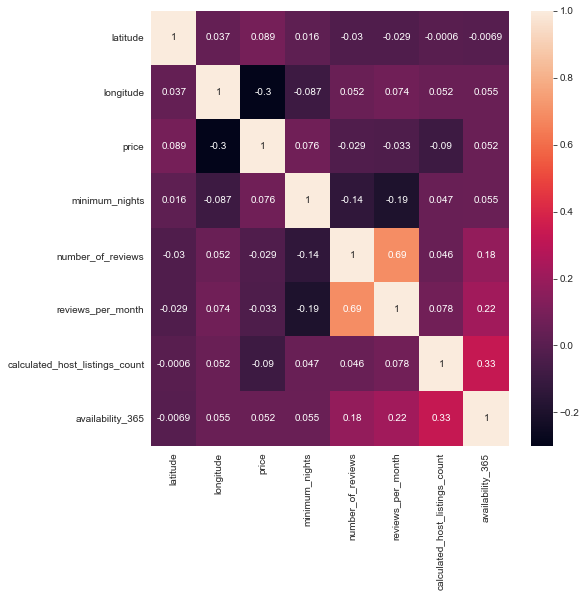

In [48]:
corr = df_p.corr(method='kendall')
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot = True)

From the heatmap we notice that correlations between price and other variables are not very far from zero. The most srtongh correlation is between price and longitude. This makes sense as Manhattan has relatively lower longitude.

### 3.3 Data Normalization

#### 3.3.1 Log-transform Predicted Variable

Our predicted variable is price and we would like to see the price density first in case wee need to do some transformation.

In [50]:
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm

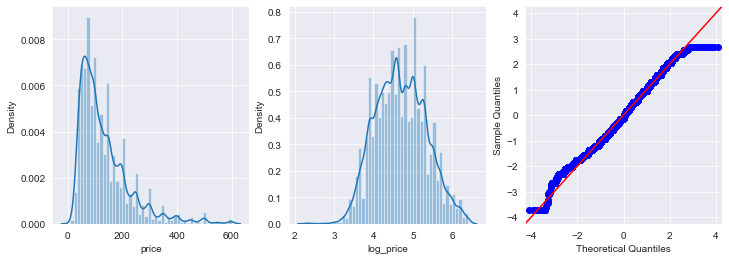

In [51]:
fig, axes = plt.subplots(1,3,figsize=(12,4))
sns.distplot(df_p['price'],ax=axes[0])
sns.distplot(np.log(df_p['price']),ax=axes[1])
axes[1].set_xlabel('log_price')
sm.qqplot(np.log(df_p['price']), stats.norm, fit=True, line='45',ax=axes[2]);

We notice that the original distribution of price is highly right-sekwed. This is because the majority price is around 100 and very few price are above 200. 
After log transformation, the density plot shows that the skewness becomes less obvious, although from the QQplot we can still detect some skewness.

In [52]:
y = df_p['price']
y_log = np.log(y)

#### 3.3.2 Encoding Categorical Features

In [53]:
x_cat = df_p[['room_type','neighbourhood_group','neighbourhood']]
x_cat = x_cat.reset_index()
x_cat_dm = pd.get_dummies(x_cat, drop_first=True)

#### 3.3.3 Rescale Numerical Features

We use RobustScaler() so that each predictor has zero mean and unit variance. This helps deal with outliers and convergence of machine learning algorithms such as linear regression.

In [56]:
x_num = df_p.select_dtypes(exclude=['object'])

In [57]:
x_num.drop(['price'],axis=1,inplace=True)

In [58]:
column_names = x_num.columns
x_num = preprocessing.RobustScaler().fit(x_num).transform(x_num)
x_num = pd.DataFrame(data=x_num,columns=column_names)
x_num = x_num.reset_index()

In [59]:
x = pd.concat([x_cat_dm,x_num],axis=1)
print(x.shape,x_cat_dm.shape,x_num.shape)

(48090, 233) (48090, 225) (48090, 8)


In [60]:
y_log.shape

(48090,)

### 3.4 Train-test Split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y_log,test_size=0.2,random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (38472, 233) (38472,)
Test set: (9618, 233) (9618,)


### 3.5 Models

We choose several commonly used models to train our data.

In [62]:
models = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    #svm.SVR(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    HistGradientBoostingRegressor(),
    BaggingRegressor()
]

table_columns = ['model_name','train_mse','test_mse','test_r2']
table = pd.DataFrame(np.zeros([len(models), len(table_columns)]),columns=table_columns)

#### 3.5.1 Cross Validation

Since we have a large dataset, we use 3-fold cross validation to train our models.

In [131]:
for i,model in enumerate(models):
    table.iloc[i,0] = model.__class__.__name__
    cv_results = cross_validate(model, x, y_log, scoring=('neg_mean_squared_error', 'r2'), cv=3, return_train_score=True)
    table.iloc[i,1] = round(cv_results['train_neg_mean_squared_error'].mean(),3)
    table.iloc[i,2] = round(cv_results['test_neg_mean_squared_error'].mean(),3)
    table.iloc[i,3] = round(cv_results['test_r2'].mean(),3)
table

,model_name,train_mse,test_mse,test_r2
0,LinearRegression,-0.167,-0.181,0.553
1,Lasso,-0.399,-0.432,-0.063
2,Ridge,-0.167,-0.180,0.554
3,RandomForestRegressor,-0.020,-0.169,0.581
4,AdaBoostRegressor,-0.210,-0.219,0.463
5,HistGradientBoostingRegressor,-0.130,-0.155,0.615
6,BaggingRegressor,-0.028,-0.195,0.518


Using cross validation, we can see that Histogram-based Gradient Boosting model performs the best. The model shows smallest mean squared errors for both training and testing datasets. Linear Regression model and Ridge model show similar results with almost the same mean squared errors and r2. These models are not bad. However, Bagging and Random Foreset models fit the training data much better than the testing data, and this observation shows there may exist overfitting problem.

Now we use train and test sets to run the models again to see if the results would be the same.

#### 3.5.1 Train and Test Sets

We now add Support Vector Machines to our models to see if the new model would improve our performance.

In [45]:
models_ = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    svm.SVR(),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    HistGradientBoostingRegressor(),
    BaggingRegressor()
]

In [49]:
table_tt = pd.DataFrame(np.zeros([len(models_), len(table_columns)]),columns=table_columns)
for i,model in enumerate(models_):
    table_tt.iloc[i,0] = model.__class__.__name__
    model_fit = model.fit(x_train,y_train)
    y_hat = model_fit.predict(x_train)
    y_pred = model_fit.predict(x_test)
    table_tt.iloc[i,1] = metrics.mean_squared_error(y_train,y_hat)
    table_tt.iloc[i,2] = metrics.mean_squared_error(y_test,y_pred)
    table_tt.iloc[i,3] = metrics.r2_score(y_test,y_pred)
table_tt

,model_name,train_mse,test_mse,test_r2
0,LinearRegression,0.167043,0.176507,0.564554
1,Lasso,0.400484,0.397918,0.018326
2,Ridge,0.167118,0.176185,0.565346
3,SVR,0.404158,0.400355,0.012314
4,RandomForestRegressor,0.020175,0.147946,0.635012
5,AdaBoostRegressor,0.207948,0.215172,0.469165
6,HistGradientBoostingRegressor,0.131376,0.148454,0.633761
7,BaggingRegressor,0.027964,0.161115,0.602526


We observe that Histogram-based Gradient Boosting Model still performs the best, and linear regression model and Ridge model have similar results. As for Support Vector Machine, it doesn't perform well for our data.

### 3.6 Tuning Parameters in Models

I choose the two best perfomed models- Ridge and Histogram-based Gradient Boosting model, and use GridSearchCV() function to to find the best paramter in each model and see whether the performances would improve.

In [ ]:
from sklearn.model_selection import GridSearchCV

#### Ridge

In [122]:
para1 = {'alpha':(0.2,0.3,0.5,0.8,1,1.5,2,2.5,4,6)}
ridge = Ridge()
grid_search1 = GridSearchCV(ridge, para1, cv=5)
grid_search1.fit(x_train, y_train)
print(grid_search1.best_estimator_)

Ridge(alpha=2)


In [123]:
best_ridge = Ridge(alpha=2)
best_ridge.fit(x_train,y_train)
y_hat = best_ridge.predict(x_train)
y_pred = best_ridge.predict(x_test)
ridge_results1 = pd.DataFrame({'Algorithm':'Ridge',
                              'alpha':2,
              'train_mse': metrics.mean_squared_error(y_hat, y_train),
              'test_mse': metrics.mean_squared_error(y_test, y_pred ),
              'test_r2': [metrics.r2_score(y_test,y_pred)]})
ridge_results1

,Algorithm,alpha,train_mse,test_mse,test_r2
0,Ridge,2,0.167233,0.176063,0.565648


#### Histogram-based Gradient Boosting

In [124]:
para2 = {'learning_rate':(0.1,0.3,0.5,0.8,1),'loss':('least_squares','poisson','least_absolute_deviation')}
hgbr = HistGradientBoostingRegressor()
grid_search2 = GridSearchCV(hgbr, para2, cv=5)
grid_search2.fit(x_train, y_train)
grid_search2.best_params_

{'learning_rate': 0.1, 'loss': 'least_squares'}

In [38]:
best_hgbr = HistGradientBoostingRegressor(loss='least_squares').fit(x_train,y_train)
y_hat = best_hgbr.predict(x_train)
y_pred = best_hgbr.predict(x_test)
hgbr_results2 = pd.DataFrame({'Algorithm':'HistGradientBoostingRegressor',
              'train_mse': metrics.mean_squared_error(y_train, y_hat),
              'test_mse': metrics.mean_squared_error(y_test, y_pred ),
              'test_r2': [metrics.r2_score(y_test,y_pred)]})
hgbr_results2

,Algorithm,train_mse,test_mse,test_r2
0,HistGradientBoostingRegressor,0.131406,0.148347,0.634025


After we tune the parameters and re-train our models, the performances basically remain the same as before. We suspect the reason is that some relevant features are not included in the model.

In order to further improve our models' performances, we believe the data should incorporate more information related to the property itself such as the decoration, years of usage, house area, convenience of transportation and distance from tourist attractions. Then combining feature engineering and model fusion to optimize algorithm performance.

### 4. Conclusion

The Airbnb Dataset for the 2019 year appears to be a very rich dataset with a variety of columns that allow us to go deep in data exploration on each specific column.

First, we have found that hosts have taken advantage of the Airbnb platform and a single host has more than 300 listings on the platform. Also, we have discovered that properties are mainly distributed in Manhattan, Brooklyn and Queens and the neighbourhood with most listing preoperties is Williamsburg in Brooklyn. As for the room types, we find that private room and whole apartment or house are more popular than shared room. After that, we proceed to analyze boroughs and rental price densities. Next, we find that the median of rental price is around 100, though properties in Manhattan charge slightly more than other boroughs. Then we make good use of longitude and latitude to create geographical heatmaps color-coded by price and number of property listings to help us see a more clear picutre of the Airbnb NYC market features. Later we use wordcloud to show vividly the top common words used in property names.

To predict rental price using exsting features, we have tried several models including linear and nonliear models. The results show that Histogram-based Gradient Boosting model performs the bset. It shows little mean squared error for both training and testing dataset. We believe the model could be improved if the dataset could incorporate more features such as negative and positive numerical reviews (0-5 stars) for each listing. Addition of these features would help to determine best-reviewed host and popularity of listing properties.

### 5. Bonus

If we want to find out the exact location of each property, we can use the folium library, but it would take some time to run.

In [ ]:
#import folium
#from folium import plugins
#latitude = 40.730610
#longtitude = -73.935242
#nyc_map = folium.Map([latitude,longtitude],zoom_start=12)
#features = plugins.MarkerCluster().add_to(nyc_map)
#for lat, lng in zip(df.latitude, df.longitude):
#    folium.Marker(
#    location=[lat,lng],
#    icon=None,
#    ).add_to(features)

#nyc_map